# Linear Regression

In [209]:
import io
from io import StringIO
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale,MinMaxScaler
from sklearn.linear_model import SGDRegressor
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import validation_curve

## Simple linear regression

### Dataset description and visualisation

<b>Student Hours & Scores: </b> In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

<div class="alert alert-block alert-warning"> 
- Is this task a multiple or a simple linear regression problem?
</div>

simple linear regression problem

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv("student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<div class="alert alert-block alert-warning"> 
- Which variable presents the dependent variable, and which one presents the independent variable?
</div>

- the dependent: Scores
- the independent: Hours

<div class="alert alert-block alert-danger"> 
1. Print the number of samples and features in the dataset.
<div/>

In [3]:
df.shape

(25, 2)

<div class="alert alert-block alert-danger"> 
2. Print the Information about the dataset features.
<div/>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<div class="alert alert-block alert-danger"> 
3. Describe the features by printing their statistics.
<div/>

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<div class="alert alert-block alert-danger"> 
3. Plot the data and observe whether it demonstrates linear separability.
<div/>

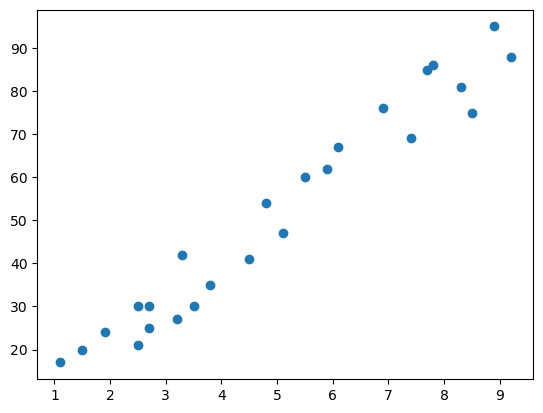

In [6]:
plt.scatter(df['Hours'],df['Scores'])

### Dataset training and evaluation

#### Splitting the data into training and testing

In [7]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:1]
Y = df.iloc[:,-1]
x_train, x_test,y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state=0) 

<div class="alert alert-block alert-danger">
    
5. Train the data using the LinearRegression module from sklearn.
6. 
Display the model's equation
7. Create a plot showing the data and the generated model.
<div/>

In [8]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
print(x_train.shape)
print(y_train.shape)

(20, 1)
(20,)


In [10]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [11]:
print(model.coef_)      # beta_1
print(model.intercept_) # beta_0

[9.91065648]
2.018160041434662


In [12]:
y_hat = model.predict(x_train)

In [13]:
y_hat_test = model.predict(x_test)

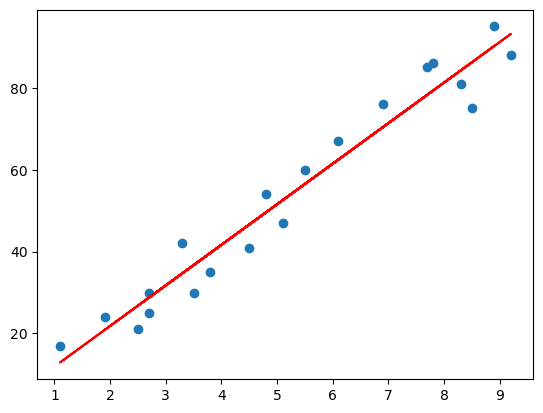

In [14]:
plt.scatter(x_train['Hours'], y_train)
plt.plot(x_train['Hours'], y_hat, color='r')

<div class="alert alert-block alert-danger">
    
8. Print the performance of the generated model on the training and the test set, based on the following metrics: MAE, MSE, RMSE, and R square. Does the generated model present an  overfitting problem?
9. Describe the R square metric and its advantages compared to the other metrics.
10. Is the generated model characterized by a good performance?
11. Create a plot visualizing the difference between actual and predicted values (r square).

<div/>

In [15]:
MAE_train = mean_absolute_error(y_train, y_hat)
MSE_train = mean_squared_error(y_train, y_hat)
RMSE_train = mean_squared_error(y_train, y_hat, squared = False)
r2_train = r2_score(y_train, y_hat)

MAE_test = mean_absolute_error(y_test, y_hat_test)
MSE_test = mean_squared_error(y_test, y_hat_test)
RMSE_test = mean_squared_error(y_test, y_hat_test, squared = False)
r2_test = r2_score(y_test, y_hat_test)


print(f"MAE_train  = {MAE_train}")
print(f"MSE_train  = {MSE_train}")
print(f"RMSE_train = {RMSE_train}")
print(f"r2_train   = {r2_train}")


print(f"\nMAE_test   = {MAE_test}")
print(f"MSE_test   = {MSE_test}")
print(f"RMSE_test  = {RMSE_test}")
print(f"r2_test   = {r2_test}")

MAE_train  = 5.186601709180373
MSE_train  = 30.898182377314544
RMSE_train = 5.558613350226344
r2_train   = 0.9515510725211552

MAE_test   = 4.183859899002982
MSE_test   = 21.598769307217456
RMSE_test  = 4.647447612100373
r2_test   = 0.9454906892105354


$
 R^{2} = 1 - \frac{\sum (y_{i} - \hat{y}_{i})^{2}}{\sum (y_{i} - \bar{y})^{2}}
$

the r2 scores of the train and test sets are so close to each other,therefore the generated the model doesn't present an  overfitting problem.

the advantage of r2 score is that it's always between 0 and 1,so it easy to interpret unlike the other metrics. 

yes

## Multiple linear regression

### Dataset description and analysis

<b> The Boston Housing Dataset: </b> the Boston Housing Dataset is derived from information collected by the U.S. Census Service regarding housing in the Boston, Massachusetts area. It aims to predict house prices based on various characteristics. 

In [91]:
df = pd.read_csv("HousingData.csv")
print(df.head())
print(df.shape)
print(df.info())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  
(506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null

<div class="alert alert-block alert-danger">
    
1. Print the correlation matrix, and select only the highly correlated features with the label (MEDV feature).
2. Verify for each selected feature if the values are linearly separable by using MEDV as a target variable.
3. Normalize data (not the label) by using the min_max_scaler strategy.

<div/>

<div class="alert alert-block alert-danger">
    
4. SGD is an iterative stochastic optimization technique. Print the convergence graph of the trained model ( x presents the iterations and y is the loss).
<div/>

![title](convergence.png)

<div class="alert alert-block alert-danger">
    
5. Vary in the learning rate value (0.01,0.001,0.0001). By comparing the convergence graphs for each model, what do you observe in terms of convergence and results?
6. Why the graph does not reach the maximum number of iterations when using the 0.01 learning rate? which variable controls this.
7. Predict the class of the following sample.
     
<div/>

![title](sample.png)